In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error,r2_score

In [80]:
df=pd.read_csv('Data_Sets\Housing.csv')

In [81]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [83]:
df.duplicated().sum()

np.int64(0)

In [84]:
numerical_columns=df.select_dtypes(include=['int','float','number'])
categorical_columns=df.select_dtypes(exclude=['int','float','number'])

categorical_columns.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [85]:
numerical_columns.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [86]:
# Using One Hot Encoder to Encode the data in categorical columns
df_encoded=pd.get_dummies(df,columns=list(categorical_columns.columns),drop_first=True)


print(df_encoded.dtypes)

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object


In [87]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [99]:
#Using Standard Scaler to standarize the values of numerical columns

sd=StandardScaler()
df_encoded[numerical_columns.columns]=sd.fit_transform(df[numerical_columns.columns])

In [98]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


In [101]:
#Summary statistics
df.describe(include='all')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


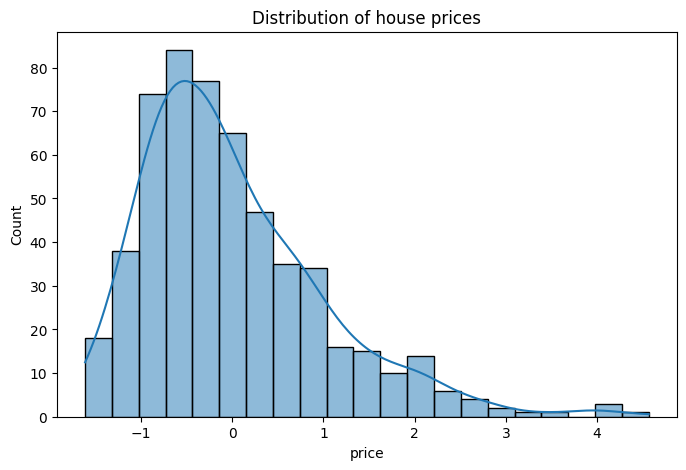

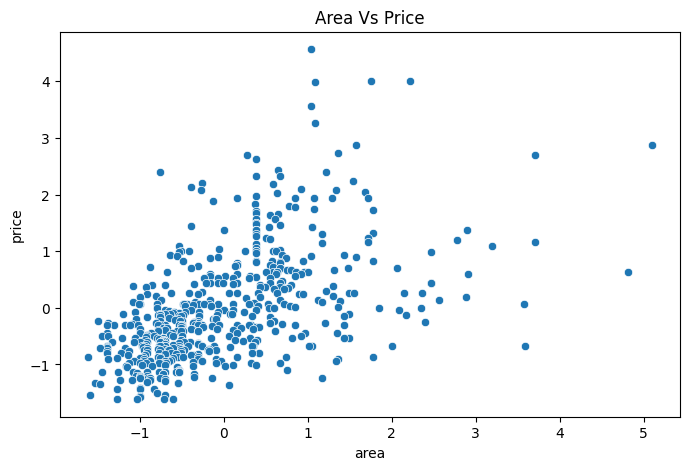

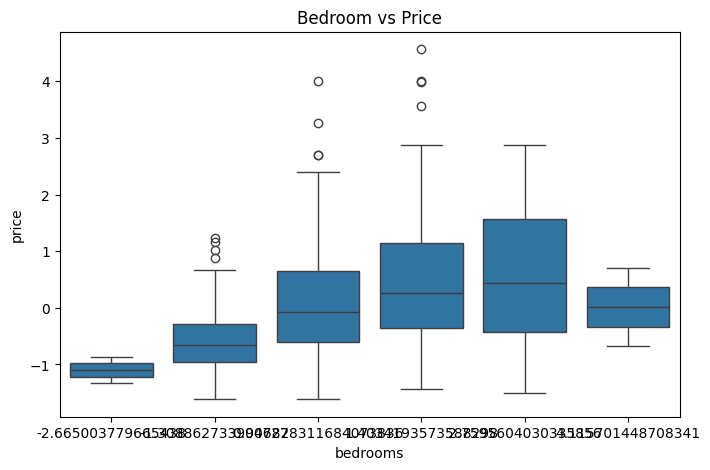

In [106]:
#Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_encoded['price'],kde=True)
plt.title('Distribution of house prices')
plt.show()

#Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='area',y='price',data=df_encoded)
plt.title('Area Vs Price')
plt.show()

#Bedroom vs Price

plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms',y='price',data=df_encoded)
plt.title('Bedroom vs Price')
plt.show()



In [105]:
from scipy.stats import skew
print(skew(df_encoded['price']))

1.208899845787822


In [107]:
df_encoded['price']=np.log1p(df_encoded['price'])

c:\Data Science\Machine_learning\Regression\Housing_Price_Prediction_System\env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [109]:
print(skew(df_encoded['price']))

nan


In [ ]:
#Use another technique to deal with skewenwss

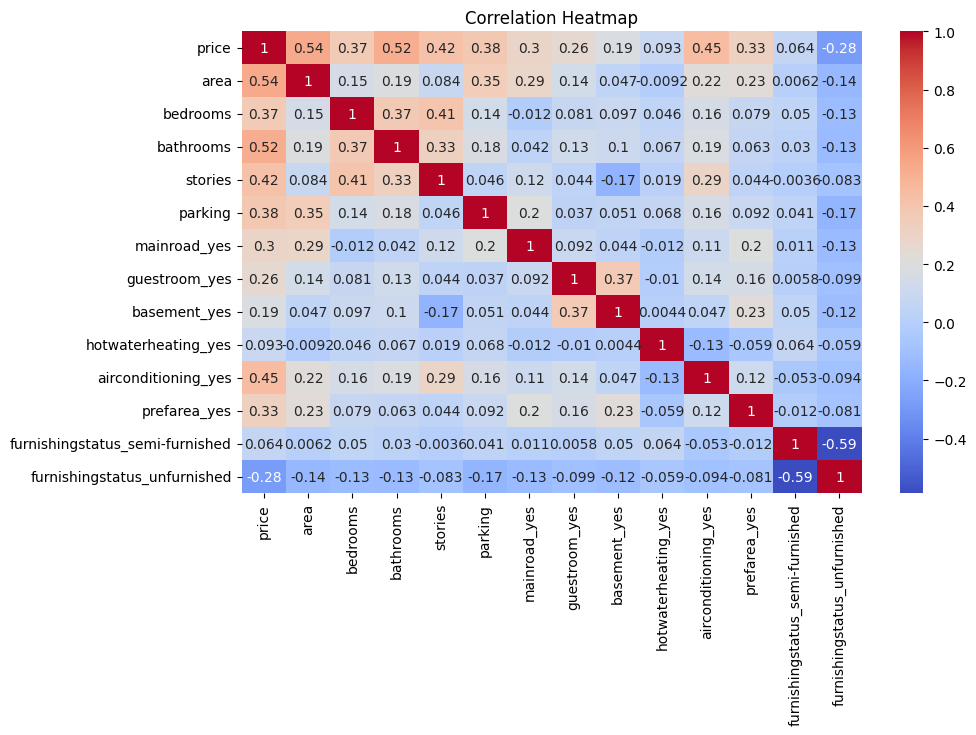

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
           

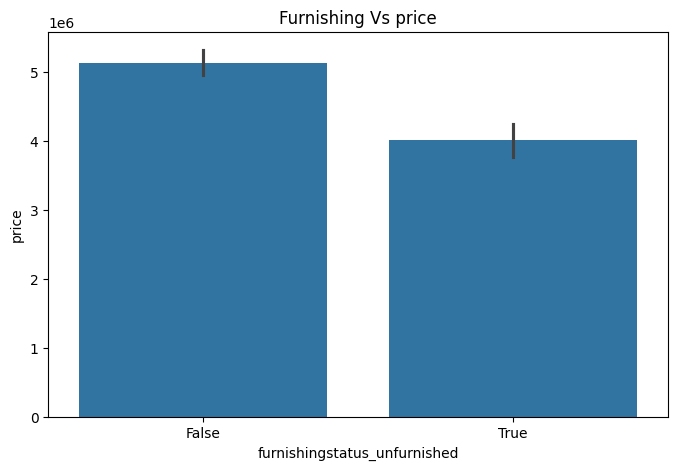

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_encoded['furnishingstatus_unfurnished'],y='price',data=df)
plt.title('Furnishing Vs price')
plt.show()

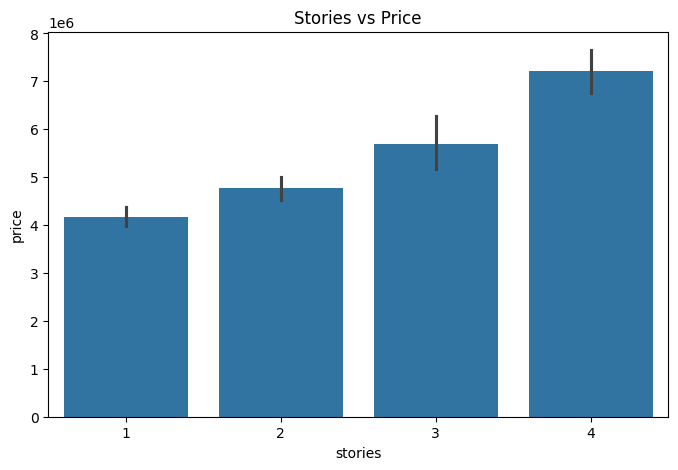

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(x='stories',y='price',data=df)
plt.title('Stories vs Price' )
plt.show()

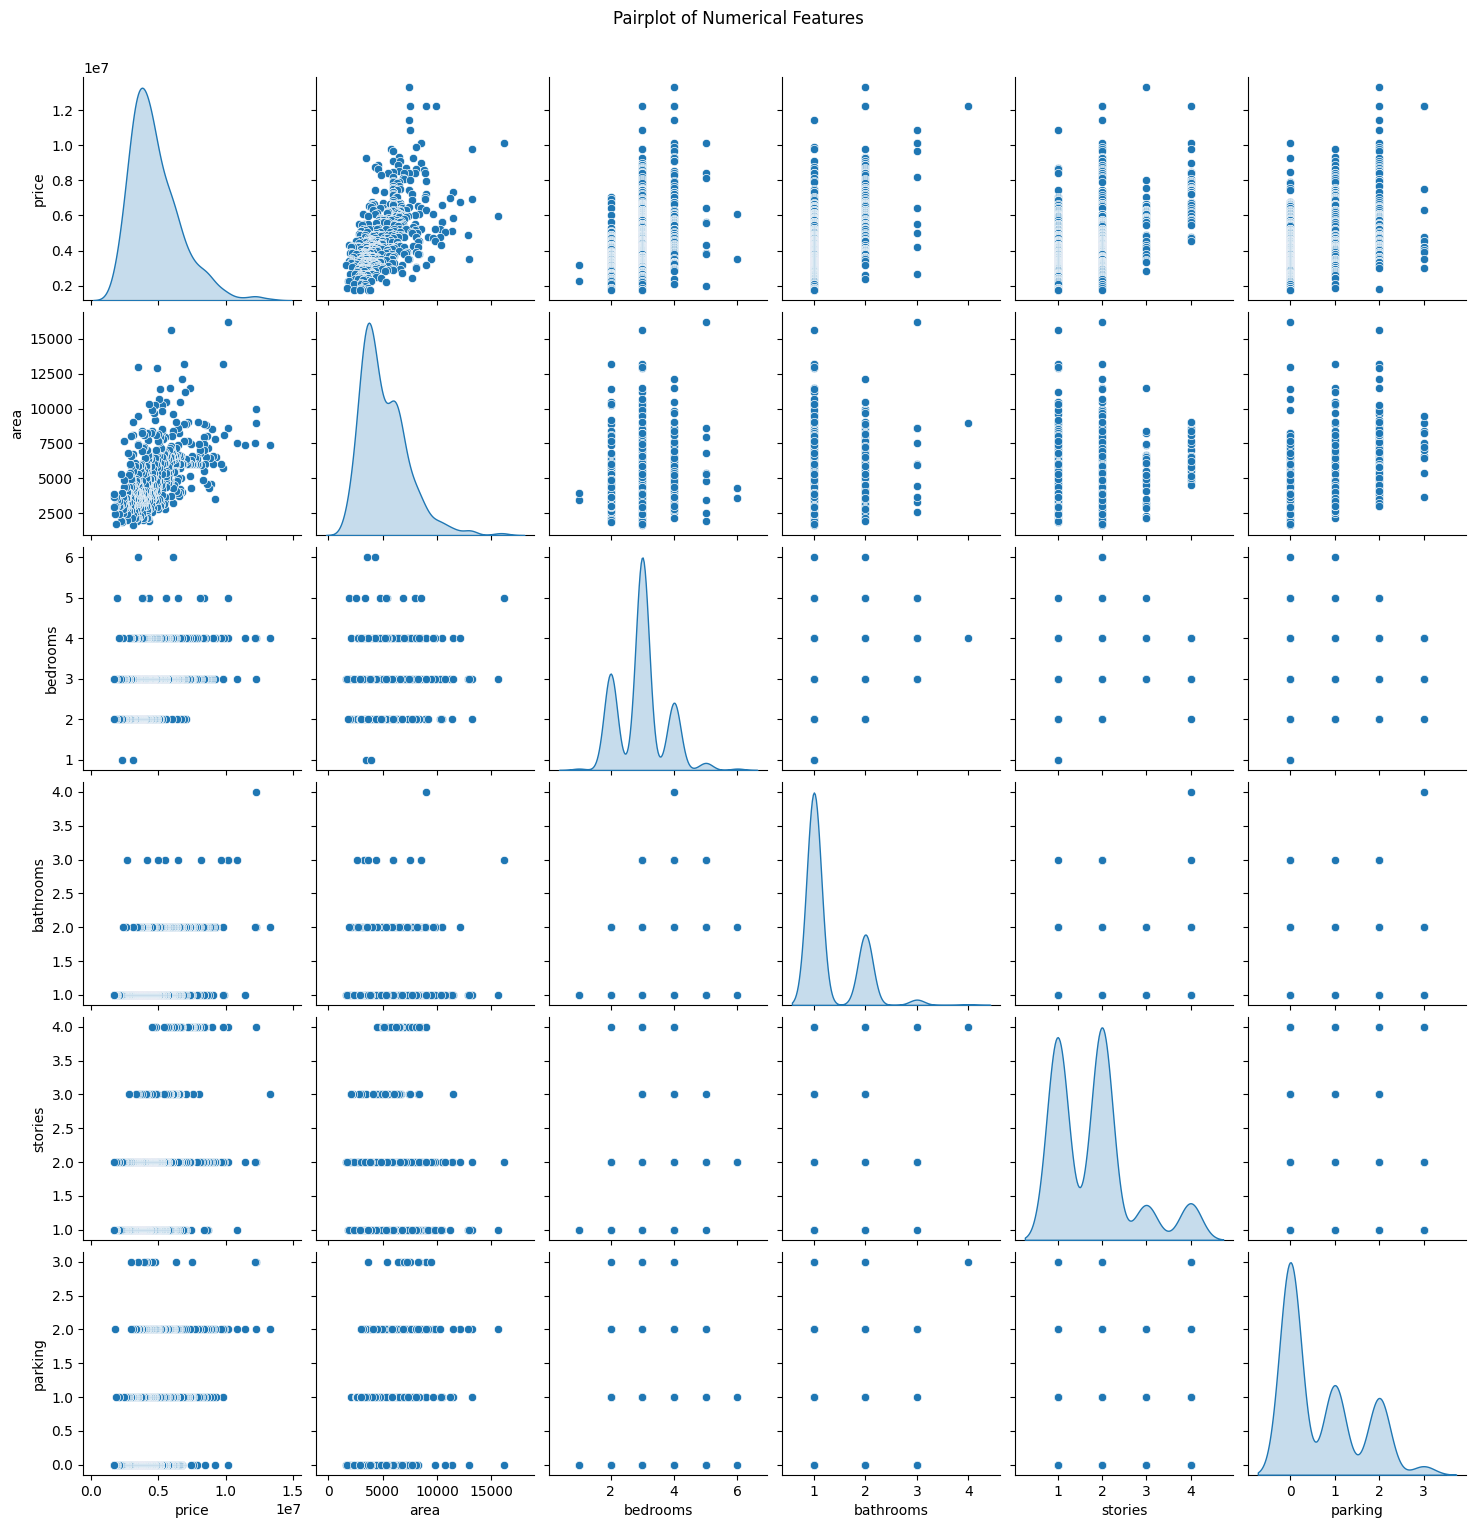

In [94]:
sns.pairplot(df,diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features',y=1.02)
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X=df_encoded.drop('price',axis=1)
y=df_encoded['price']

X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
# model=RandomForestRegressor()
model.fit(X_train,y_train)

print('Model R**2 on training data',model.score(X_train,y_train))

Model R**2 on training data 0.6859438988560158


In [96]:

#fit VS fIT_transform


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X=df_encoded.drop('price',axis=1)
y=df_encoded['price']

X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=DecisionTreeRegressor()
# model=RandomForestRegressor()
model.fit(X_train,y_train)

print('Model R**2 on training data',model.score(X_train,y_train))

Model R**2 on training data 0.9985402884288594
